a) Load 'skeleton_orig.tif'  

Original data type: uint8
Kernel SZ1: [1.]
New data type: int16
Image size: (800, 500)
Image min: 0 and Image max: 255


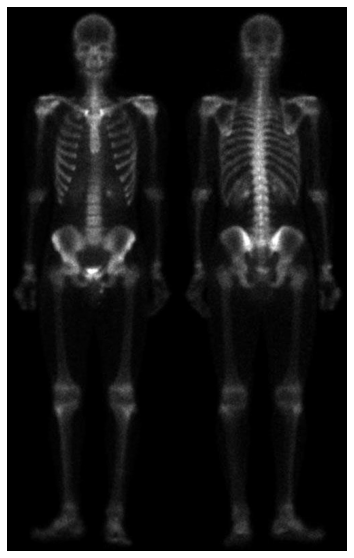

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("/content/skeleton_orig.tif", cv.IMREAD_GRAYSCALE)
kernel_sz1 = np.ones(1)
## Change data type of image
img_a = cv.filter2D(img, cv.CV_16S, kernel_sz1)
print("Original data type: {}".format(img.dtype))
print("Kernel SZ1: {}".format(kernel_sz1))
print("New data type: {}".format(img_a.dtype))
print("Image size: {}".format(img_a.shape))
print("Image min: {} and Image max: {}".format(img_a.min(), img_a.max()))
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


b) Apply and display Laplacian of a

Original data type: int16
New data type: int16
Image size: (800, 500)
Image min: 0 and Image max: 255


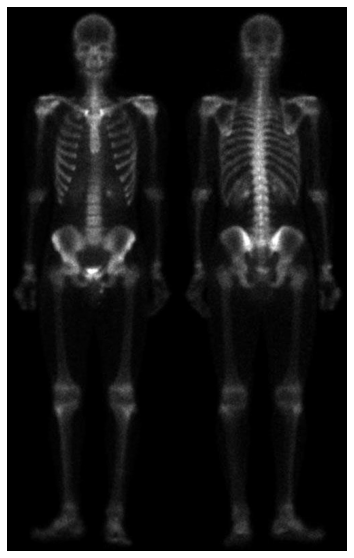

In [ ]:
kernel_size = 1
ddepth = cv.CV_16S

#img_b = cv.Laplacian(img_a, ddepth, ksize=kernel_size)
lap_filter = np.array ([[0,1,0],[1,-4,1],[0,1,0]])
#lap_filter = np.array([[0,1,0],[1,8-1],[0,1,0]])
img_b = cv.filter2D(img_a, ddepth, lap_filter)
img_b_abs = cv.convertScaleAbs(img_b-img_b.min())



print("Original data type: {}".format(img_b.dtype))
print("New data type: {}".format(img_b.dtype))
print("Image size: {}".format(img_a.shape))
print("Image min: {} and Image max: {}".format(img_a.min(), img_a.max()))
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

c) Sharpen the image obtained by adding a) and b)

Data_type is {} int16
Min and Max of img_c are -35 and 331


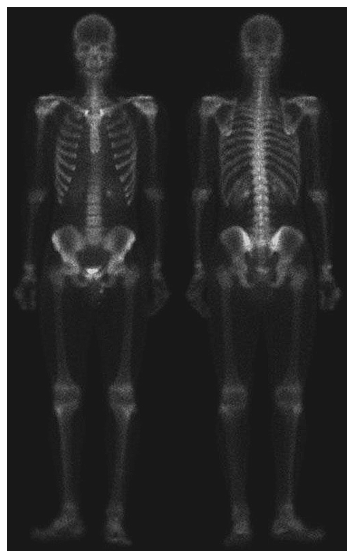

In [ ]:
#@title
c= -1
img_c = cv.addWeighted(img_a, 1, img_b, c, 0)
print('Data_type is {}', img_c.dtype)
print('Min and Max of img_c are {} and {}'.format(img_c.min(), img_c.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_c, cmap='gray')
plt.axis('off')
plt.show()

d) Sobel gradient of a)

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Datatype is {} int16
Min and Max of img_d are 0 and 286


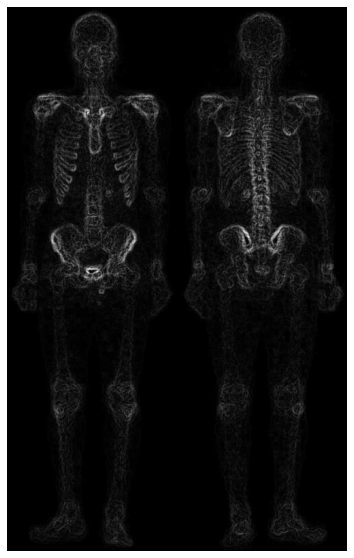

In [ ]:
#@title
soble_filter_dx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
print(soble_filter_dx)
soble_filter_dy = soble_filter_dx.T
print(soble_filter_dy)

ddepth = cv.CV_16S
img_d_dx = cv.filter2D(img_a, ddepth, soble_filter_dx)
img_d_dy = cv.filter2D(img_a, ddepth, soble_filter_dy)
cabs = lambda x: cv.absdiff(x,0)
img_d = cv.addWeighted(cabs(img_d_dx), 0.5, cabs(img_d_dy), 0.5,0)
print('Datatype is {}',img_d.dtype)
print('Min and Max of img_d are {} and {}'.format(img_d.min(),img_d.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_d,cmap = 'gray')
plt.axis('off')
plt.show()


e) Smooth the d) with a $5\\times 5$ averaging filter

Average filter is [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
Data_type is float32
Min and Max of img e are 0.0 and 188.1999969482422


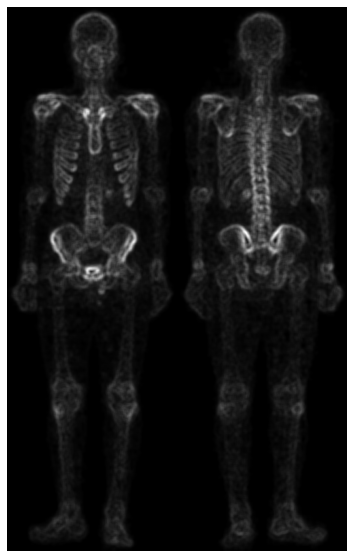

In [ ]:
#@title
avg_filter = np.ones((5,5))
avg_filter = avg_filter/avg_filter.sum()
print('Average filter is {}'.format(avg_filter))

ddepth = cv.CV_32F
img_e= cv.filter2D(img_d, ddepth, avg_filter)

print('Data_type is {}'.format(img_e.dtype))
print('Min and Max of img e are {} and {}'.format(img_e.min(), img_e.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_e, cmap='gray')
plt.axis('off')
plt.show()

f) Get Mask image formed by pixelwise product of c) and e)

Min and Max of img f are -2260.800048828125 and 50060.4453125
Data_type is ()
Min and Max of img_f are -5.487667560577393 and 121.5123291015625


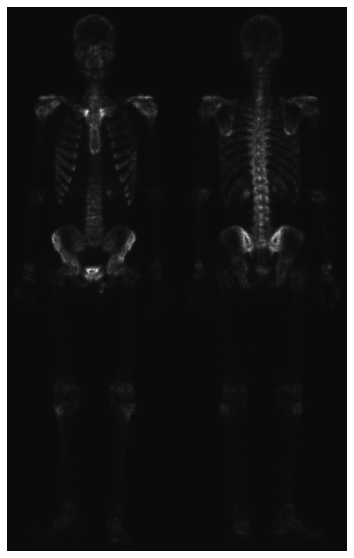

In [ ]:
#@title
ddepth = cv.CV_32F

img_f= cv.multiply(img_c, img_e,dtype=ddepth)

img_f_min, img_f_max, minLoc, maxLoc = cv.minMaxLoc(img_f)

print('Min and Max of img f are {} and {}'.format(img_f_min, img_f_max)) 
#img_f= cv.add(img_f, -img_f_min) 
#img_fmin, img_f_max, minLoc, maxLoc= cv.minMaxLoc(img_f)
#print('Min and Max of img_e are {} and {}'.format(img_f_min, img_f_max))
img_f = cv.multiply(img_f, 127.0/(img_f_max - img_f_min))

img_f_min, img_f_max, minloc, maxLoc = cv.minMaxLoc(img_f)

#img_f= cv.convertScaleAbs (img_f) 
print('Data_type is ()'.format (img_f.dtype))

print('Min and Max of img_f are {} and {}'.format (img_f_min, img_f_max))

plt.figure(figsize=(10,10))

plt.imshow(img_f, cmap='gray')

plt.axis('off')

plt.show()

g) Get sharpened image obtained by the sum of a) and f)

Datatype is {} float32
Min and Max of img_g are -1.3965781927108765 and 371.5123291015625


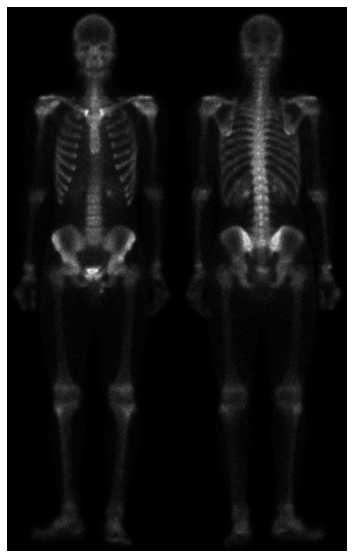

In [ ]:
img_g = cv.add(img_a, img_f, dtype=ddepth)
img_g_min, img_g_max, minLoc, maxLoc = cv.minMaxLoc(img_g)
print('Datatype is {}',img_g.dtype)
print('Min and Max of img_g are {} and {}'.format(img_g.min(),img_g.max()))
plt.figure(figsize=(10,10))
plt.imshow(img_g,cmap = 'gray')
plt.axis('off')
plt.show()

 h) Final results obtained by applying power law transformation to g)

Min and Max of img_g_norm are <built-in method min of numpy.ndarray object at 0x7f517b14cee0> and <built-in method max of numpy.ndarray object at 0x7f517b14cee0>
Min and Max of img_h_norm are <built-in method min of numpy.ndarray object at 0x7f517b14e7b0> and <built-in method max of numpy.ndarray object at 0x7f517b14e7b0>
Min and Max of img_h are 0.0 and 255.0


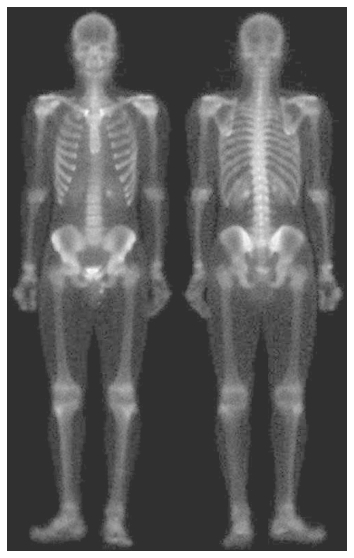

In [ ]:
img_g_norm = cv.divide(cv.add(img_g, -img_g_min), cv.add(img_g_max, -img_g_min))
img_g_norm_min, img_g_norm_max, minLoc, maxLoc = cv.minMaxLoc(img_g_norm)
print('Min and Max of img_g_norm are {} and {}'.format(img_g_norm.min,img_g_norm.max))

img_h_norm = cv.pow(img_g_norm, 0.3)
img_h_norm_min, img_h_norm_max, minLoc, maxLoc = cv.minMaxLoc(img_h_norm)
print('Min and Max of img_h_norm are {} and {}'.format(img_h_norm.min,img_h_norm.max))

img_h = cv.convertScaleAbs(img_h_norm, alpha=255)
img_h_min, img_h_max, minLoc , maxLoc= cv.minMaxLoc(img_h)
print('Min and Max of img_h are {} and {}'.format(img_h_min,img_h_max))

plt.figure(figsize=(10,10))
plt.imshow(img_h,cmap = 'gray')
plt.axis('off')
plt.show()

**OBSERVATION**
made the picture very clear and modified.